# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações adicionais

In [2]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Carregando o banco de dados

In [3]:
banco = pd.read_csv("Training_Dataset_v2.csv", low_memory = False)

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

# Transformações nas variáveis

## Retirando a variável sku

In [5]:
banco = banco.drop("sku", axis = 1)

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## Lidando com os valores NaN

- Nenhum ganho absurdo de diferença inputando a média, mediana ou moda (a mesma nos dá score parecidos);
- O melhor ganho, foi dropando os NaNs e utilizando a estratégia de colocar o 999 no lugar deles
    - A variável lead_time teve uma maior importância (0.02964);
    - O **recall** (nos dá informações sobre falsos negativos, de todos os exemplos que realmente são verdadeiros, o quanto meu modelo meu modelo previu corretamente), métrica que queremos maximizar, teve o valor de 0.46/0.47.

In [6]:
banco.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [7]:
#--- Para comentar as linhas: Ctrl + "/" (teclado numérico)

#--- Dropando todas

# banco = banco.dropna()

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mean())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].median())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando a moda na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mode()[0])

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando o 0 na variável lead_time

banco = banco[: -1] 

banco["lead_time"] = banco["lead_time"].fillna(999)

banco.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,-1.0,999.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


## Trocando as variáveis qualitativas para quantitativas

In [8]:
columns_yesno = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]

banco[columns_yesno] = banco[columns_yesno].replace({"No" : 0, "Yes": 1})

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


## Criando novas features

In [9]:
#--- Boa variável

banco["national_inv_poly2"] = banco["national_inv"] ** 2

#--- Variável ok

# banco["national_inv_qual"] = banco["national_inv"].map(lambda x: 0 if x < 0 else 1)

#--- Média entre as variáveis perf_X_month (boa)

banco["perf_month_avg"] = banco[["perf_6_month_avg", "perf_12_month_avg"]].mean(axis = 1)

## Separando em treino e teste

In [10]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(banco.drop("went_on_backorder", axis = 1), banco["went_on_backorder"], train_size = 0.7, random_state = 1234, stratify = banco["went_on_backorder"])

In [11]:
print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(1181502, 23) (1181502,) (506358, 23) (506358,)


In [12]:
print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_treino.value_counts(normalize = True))

print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_teste.value_counts(normalize = True))

---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.993309
1    0.006691
Name: went_on_backorder, dtype: float64
---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.993309
1    0.006691
Name: went_on_backorder, dtype: float64


# Oversampling (Adição de mais cópias da classe minoritária (poucos pedidos em atraso))

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 1234)
x_treino1, y_treino1 = ros.fit_resample(x_treino, y_treino)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

dec_tree_cl = DecisionTreeClassifier(min_samples_leaf=5, 
                                     min_samples_split=5, 
                                     max_depth=None, 
                                     random_state = 1234)

# Train Decision Tree Classifer
dec_tree_cl = dec_tree_cl.fit(x_treino1, y_treino1)

#Predict the response for test dataset
y_pred = dec_tree_cl.predict(x_teste)

#--- Considerações 

# 1. Quando utilizo o class_weight ele melhora significativamente a precion e recall
# 2. min_samples_leaf=2, min_samples_split=2, max_depth=None,class_weight = {0: 0.51, 1: 72.34} (1)

# Métricas a serem avaliadas

In [15]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, y_pred)

print("Accuracy:", acc)

Accuracy: 0.986772204645725


In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[498103   4867]
 [  1831   1557]]


In [17]:
pd.crosstab(y_teste, y_pred, rownames = ["True"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
True,,,
0,498103,4867,502970
1,1831,1557,3388
All,499934,6424,506358


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    502970
           1       0.24      0.46      0.32      3388

    accuracy                           0.99    506358
   macro avg       0.62      0.72      0.66    506358
weighted avg       0.99      0.99      0.99    506358



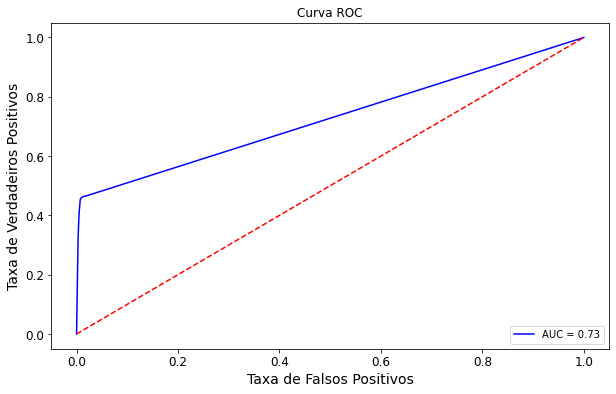

In [19]:
#--- Adaptado de: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics

probs = dec_tree_cl.predict_proba(x_teste)
preds = probs[:,1]
fpr, vpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, vpr)

#--- Curva

plt.figure(figsize = [10, 6])
plt.title("Curva ROC")
plt.plot(fpr, vpr, "blue", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, color = "black")
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

# Importância das variáveis para o modelo de Decision Tree

In [20]:
pd.DataFrame(dec_tree_cl.feature_importances_, x_teste.columns).reset_index().rename(columns = {0: "Valor", "index": "Variável"}).sort_values("Valor", ascending = False).round(5)

,Variável,Valor
3,forecast_3_month,0.35213
0,national_inv,0.18376
6,sales_1_month,0.05549
22,perf_month_avg,0.04351
21,national_inv_poly2,0.04175
5,forecast_9_month,0.03854
9,sales_9_month,0.03625
8,sales_6_month,0.03543
14,perf_12_month_avg,0.03449
1,lead_time,0.02964


# Próximos passos:

1. Criar novas features;
2. Verificar a relação das variáveis (esqueci hoje);
3. Observar as variáveis national_inv e lead_time;
4. Testar o método de oversampling e undersampling.


Falso positivo: o modelo previu que era um pedido em atraso, quando não era 
um pedido em atraso

Falso negativo (*): o modelo disse que não era um pedido em atraso, quando na verdade ele era

- Focar na métrica Recall